# Importações

In [2]:
import pandas as pd
from os import listdir
from os.path import isfile, join
import numpy as np

# Criando variáveis organizacionais

# Tratamentos iniciais dos dados

## Tratamentos básicos

## Transformação de dados e preenchimento

### Formatando data e hora

### Tratando valores nulos de radiação

### Imputer da variável de vento

### Transformando chuva em variável categórica

In [1]:
from RainPredictionMachine.data import clean_data_rpm

In [4]:
cleaner = clean_data_rpm()

df2 = cleaner.clean_data(1)

# Explorando os dados

## Verificando células nulas

In [5]:
df2.isnull().sum().sort_values(ascending=False)/len(df2)

classe_chuva        1.0
Umid_min            0.0
datahora            0.0
Altitude            0.0
Longitude           0.0
Latitude            0.0
Estaçao             0.0
Vel_vento           0.0
Rajada_vento        0.0
Dir_vento           0.0
Umid                0.0
Chuva               0.0
Pres                0.0
Temp_orvalho_min    0.0
Temp_orvalho_max    0.0
Temp_min            0.0
Temp_max            0.0
Temp_orvalho        0.0
Temp                0.0
Radiacao            0.0
Pres_min            0.0
Pres_max            0.0
Umid_max            0.0
dtype: float64

## Scale sensitivity

In [83]:
from RainPredictionMachine.Trainer import pipe_creator


ModuleNotFoundError: No module named 'tensorflow'

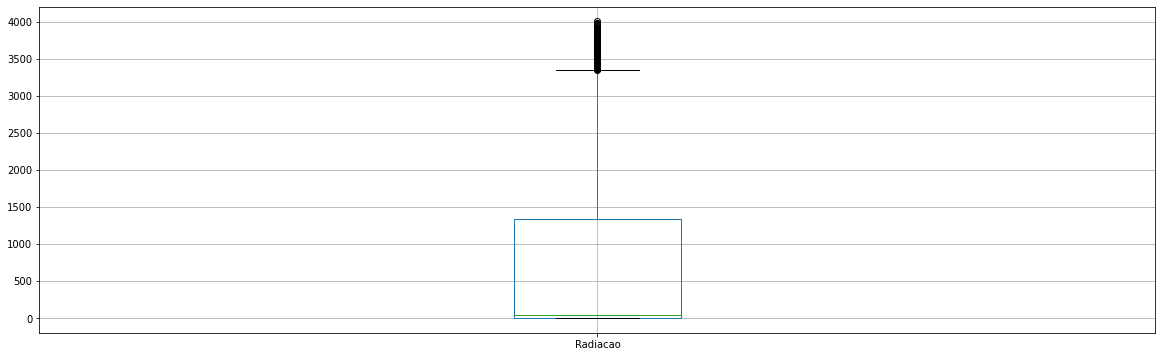

In [12]:
df2[['Radiacao']].boxplot(figsize=(20,6));

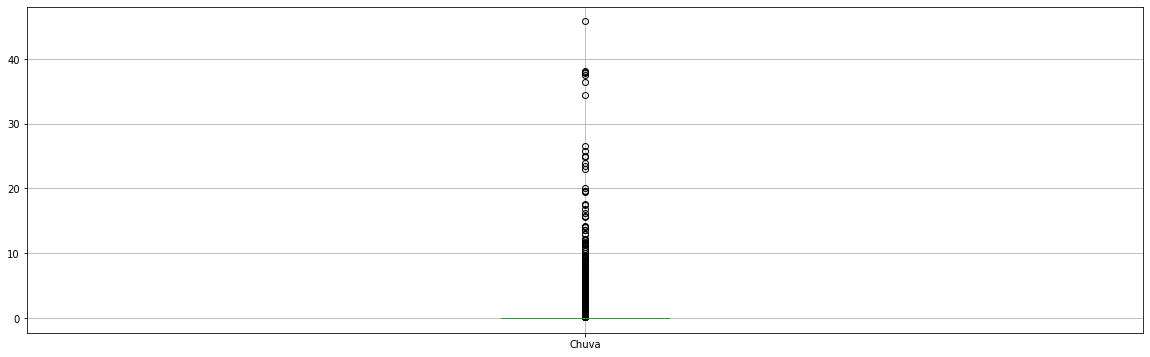

In [62]:
df2[['Chuva']].boxplot(figsize=(20,6));

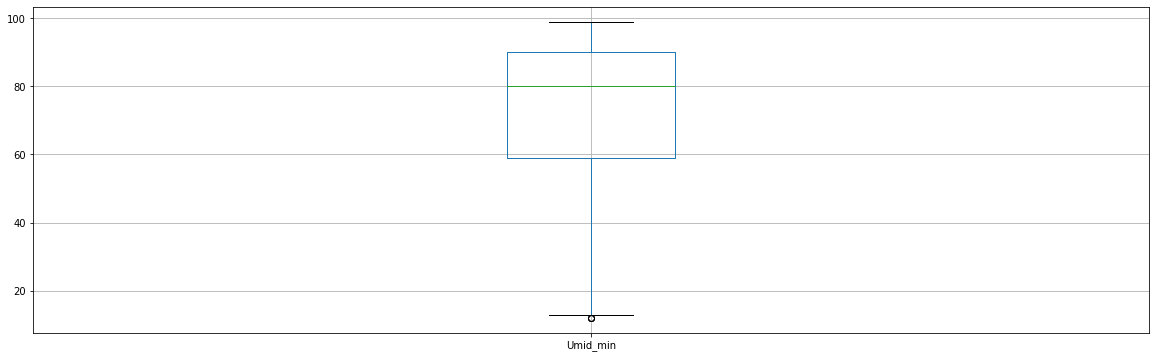

In [63]:
df2[['Umid_min']].boxplot(figsize=(20,6));

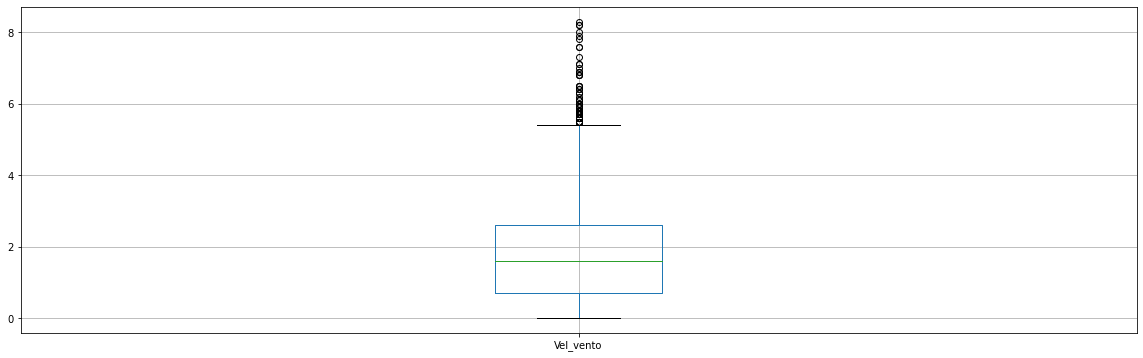

In [64]:
df2[['Vel_vento']].boxplot(figsize=(20,6));

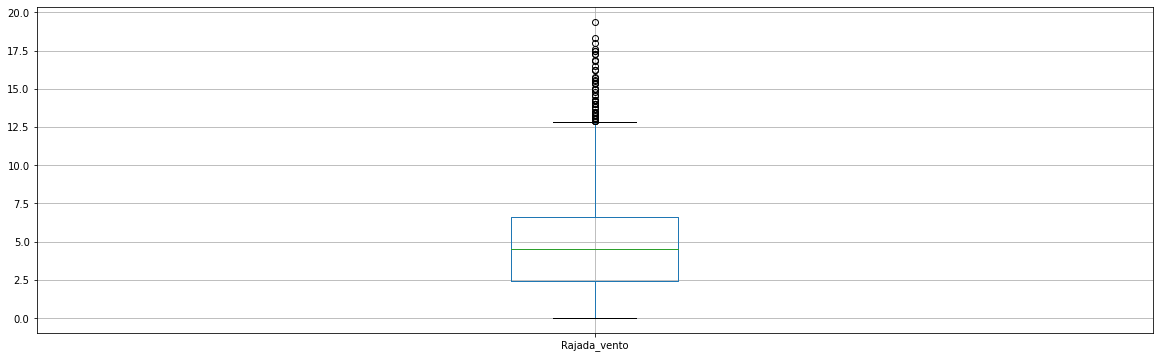

In [65]:
df2[['Rajada_vento']].boxplot(figsize=(20,6));

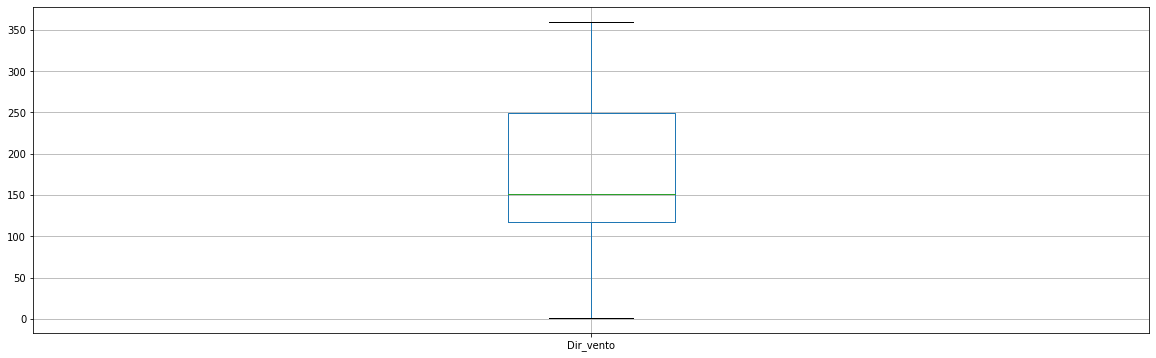

In [66]:
df2[['Dir_vento']].boxplot(figsize=(20,6));

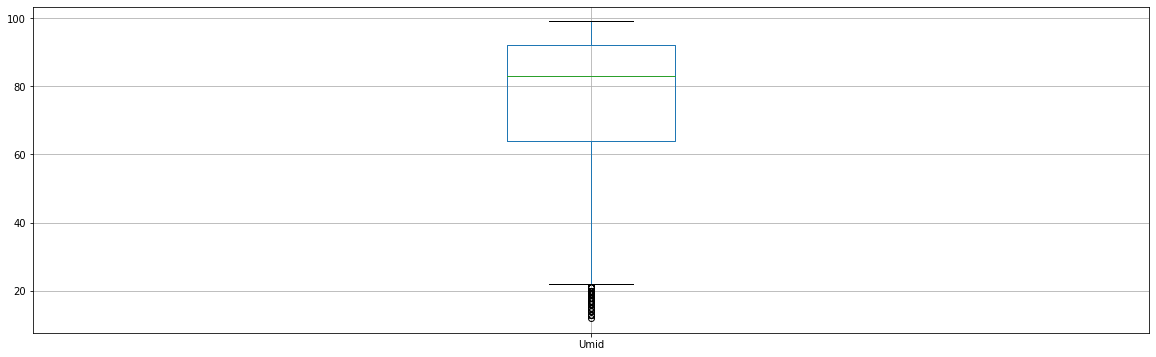

In [67]:
df2[['Umid']].boxplot(figsize=(20,6));

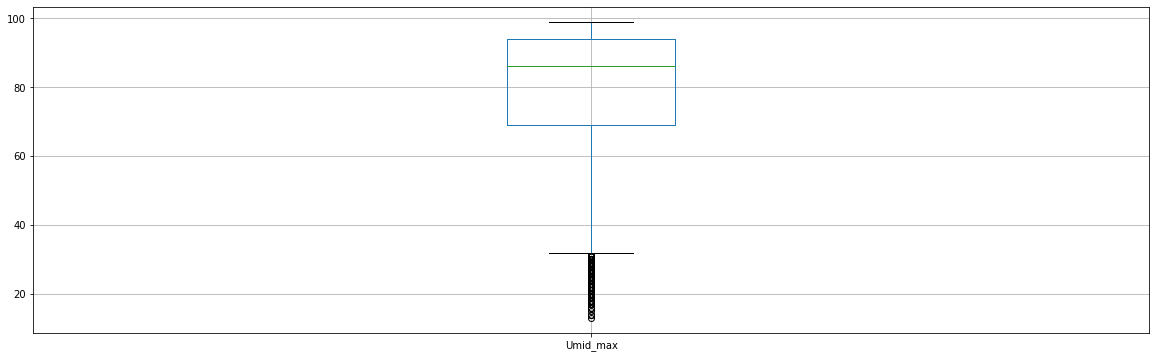

In [68]:
df2[['Umid_max']].boxplot(figsize=(20,6));

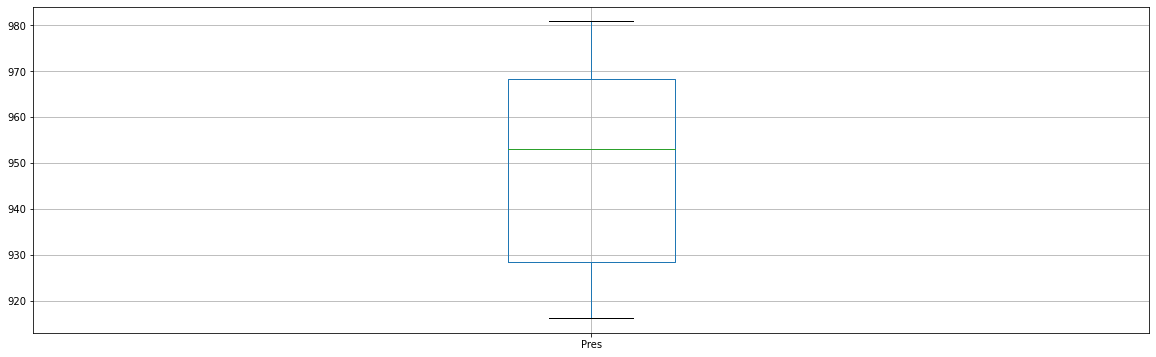

In [69]:
df2[['Pres']].boxplot(figsize=(20,6));

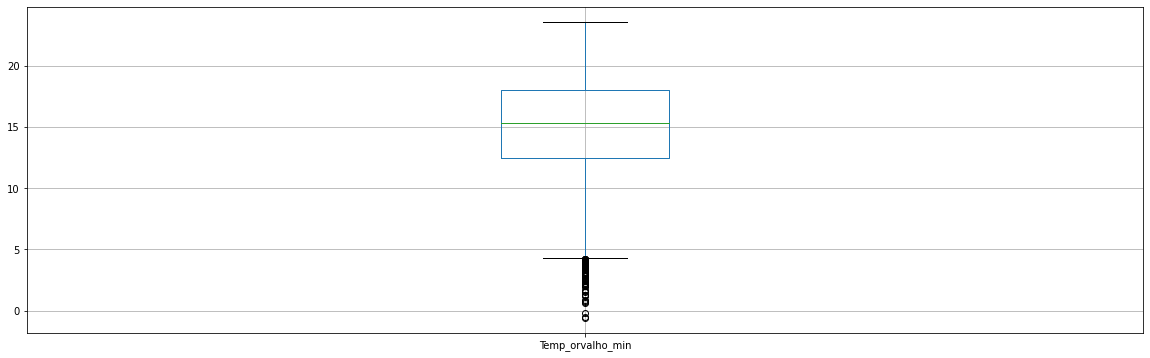

In [70]:
df2[['Temp_orvalho_min']].boxplot(figsize=(20,6));

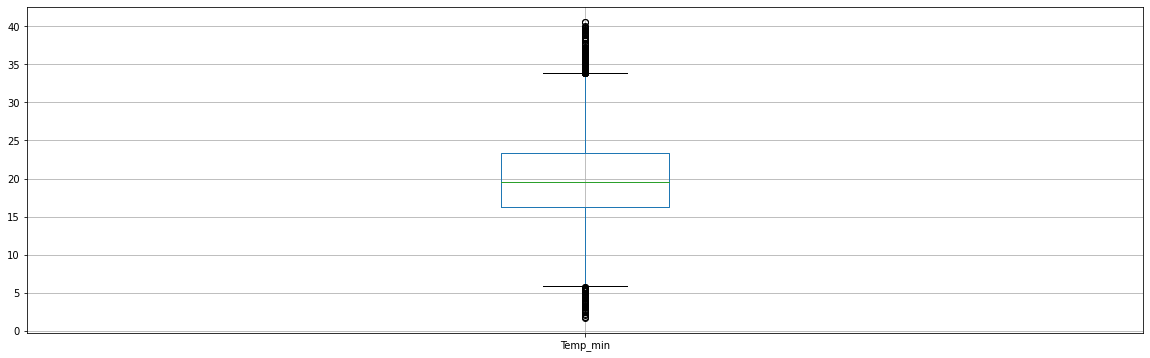

In [71]:
df2[['Temp_min']].boxplot(figsize=(20,6));

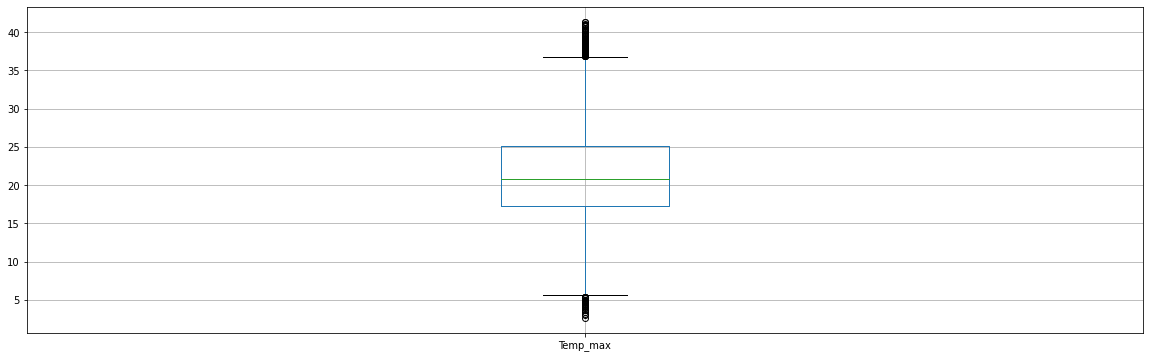

In [72]:
df2[['Temp_max']].boxplot(figsize=(20,6));

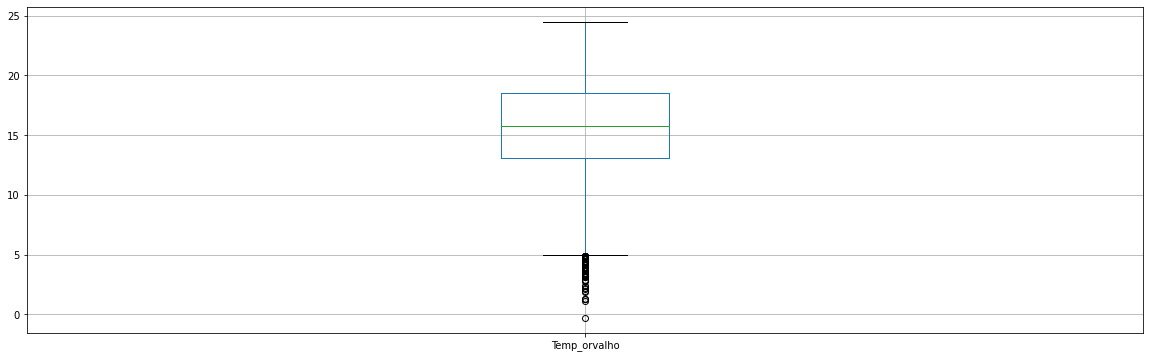

In [73]:
df2[['Temp_orvalho']].boxplot(figsize=(20,6));

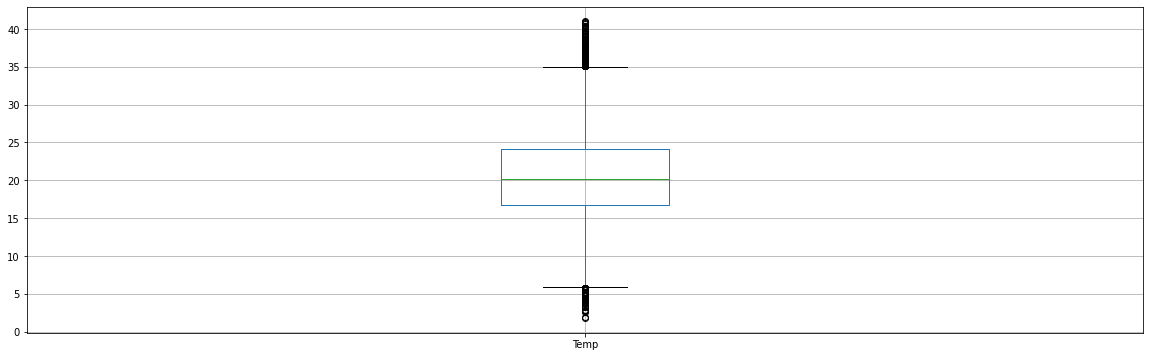

In [74]:
df2[['Temp']].boxplot(figsize=(20,6));

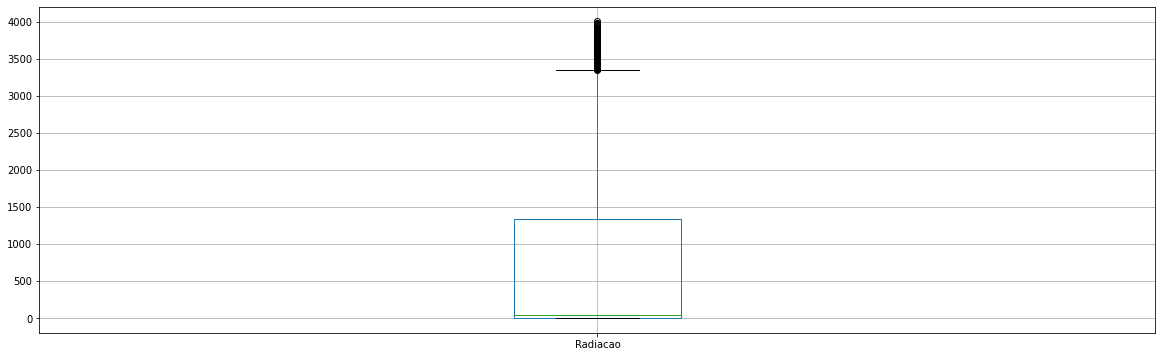

In [75]:
df2[['Radiacao']].boxplot(figsize=(20,6));

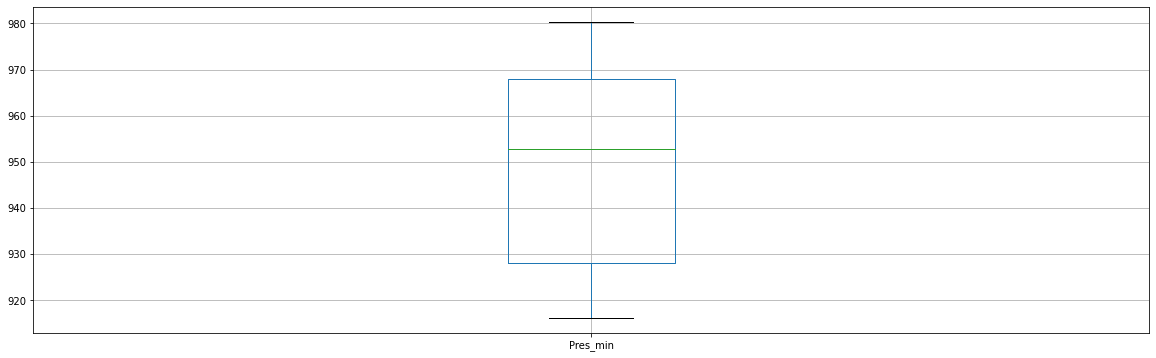

In [76]:
df2[['Pres_min']].boxplot(figsize=(20,6));

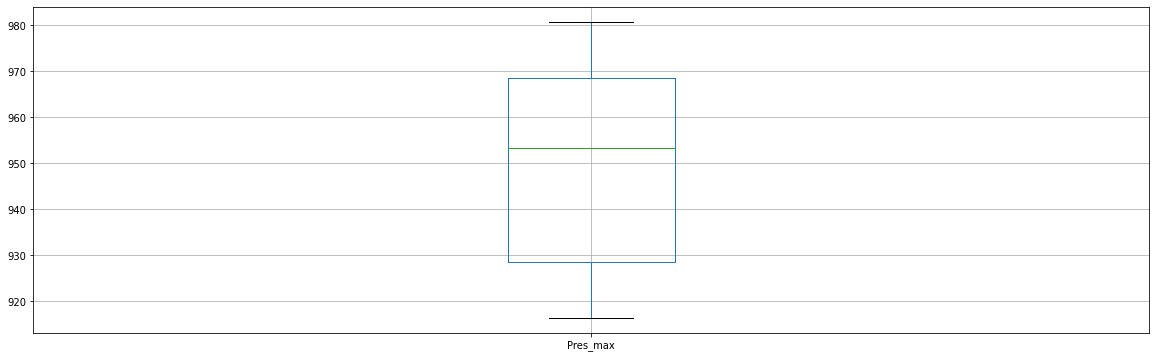

In [77]:
df2[['Pres_max']].boxplot(figsize=(20,6));

In [82]:
df2['classe_chuva'].value_counts

<bound method IndexOpsMixin.value_counts of 0       nao chove
1       nao chove
2       nao chove
3       nao chove
4       nao chove
          ...    
8779    nao chove
8780    nao chove
8781    nao chove
8782        fraca
8783        fraca
Name: classe_chuva, Length: 17568, dtype: object>

## Contando a quantidade de eventos de intensidade de chuva

In [14]:
chuva_zero = df2[df2['classe_chuva']  == 'nao chove']
chuva_zero

,Chuva,Pres,Pres_max,Pres_min,Radiacao,Temp,Temp_orvalho,Temp_max,Temp_min,Temp_orvalho_max,...,Umid,Dir_vento,Rajada_vento,Vel_vento,Estaçao,Latitude,Longitude,Altitude,datahora,classe_chuva
0,0.0,923.1,923.1,922.1,0.0,22.0,20.5,22.2,21.8,20.5,...,92.0,172.0,2.8,0.4,SAO PAULO - INTERLAGOS,-23.724501,-46.677501,771.00,2020-01-01 00:00:00+00:00,nao chove
1,0.0,923.7,923.7,923.1,0.0,22.1,20.7,22.3,22.0,20.8,...,92.0,101.0,1.8,0.9,SAO PAULO - INTERLAGOS,-23.724501,-46.677501,771.00,2020-01-01 01:00:00+00:00,nao chove
2,0.0,923.6,923.8,923.6,0.0,23.2,20.1,23.5,22.1,20.8,...,82.0,7.0,3.3,1.2,SAO PAULO - INTERLAGOS,-23.724501,-46.677501,771.00,2020-01-01 02:00:00+00:00,nao chove
3,0.0,923.1,923.6,923.1,0.0,23.3,19.5,23.6,23.1,20.1,...,79.0,6.0,3.0,1.2,SAO PAULO - INTERLAGOS,-23.724501,-46.677501,771.00,2020-01-01 03:00:00+00:00,nao chove
4,0.0,922.6,923.1,922.6,0.0,22.9,19.0,23.6,22.8,19.5,...,79.0,345.0,3.5,0.6,SAO PAULO - INTERLAGOS,-23.724501,-46.677501,771.00,2020-01-01 04:00:00+00:00,nao chove
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8776,0.0,966.5,967.6,966.5,2276.4,30.7,22.2,30.7,28.6,22.2,...,61.0,320.0,9.9,3.4,RANCHARIA,-22.372832,-50.974710,398.75,2020-12-31 16:00:00+00:00,nao chove
8778,0.0,966.0,966.8,966.0,1420.7,26.7,22.7,26.8,23.9,23.1,...,79.0,260.0,8.3,2.2,RANCHARIA,-22.372832,-50.974710,398.75,2020-12-31 18:00:00+00:00,nao chove
8779,0.0,965.8,966.0,965.6,1636.0,26.7,22.2,27.6,26.2,23.3,...,76.0,310.0,6.3,2.4,RANCHARIA,-22.372832,-50.974710,398.75,2020-12-31 19:00:00+00:00,nao chove
8780,0.0,966.2,966.2,965.8,751.1,25.7,21.8,27.0,25.7,22.8,...,79.0,308.0,5.5,2.8,RANCHARIA,-22.372832,-50.974710,398.75,2020-12-31 20:00:00+00:00,nao chove


In [15]:
chuva_fraca = df2[df2['classe_chuva']  == 'fraca']
chuva_fraca

,Chuva,Pres,Pres_max,Pres_min,Radiacao,Temp,Temp_orvalho,Temp_max,Temp_min,Temp_orvalho_max,...,Umid,Dir_vento,Rajada_vento,Vel_vento,Estaçao,Latitude,Longitude,Altitude,datahora,classe_chuva
23,0.8,921.8,921.9,920.2,0.0,22.2,21.2,23.9,21.8,21.3,...,94.0,248.0,5.4,0.8,SAO PAULO - INTERLAGOS,-23.724501,-46.677501,771.00,2020-01-01 23:00:00+00:00,fraca
24,0.8,922.6,922.6,921.8,0.0,21.6,21.2,22.2,21.5,21.6,...,98.0,339.0,2.6,0.9,SAO PAULO - INTERLAGOS,-23.724501,-46.677501,771.00,2020-01-02 00:00:00+00:00,fraca
25,0.6,922.9,922.9,922.6,0.0,21.6,20.4,21.9,21.6,21.4,...,93.0,2.0,4.4,1.8,SAO PAULO - INTERLAGOS,-23.724501,-46.677501,771.00,2020-01-02 01:00:00+00:00,fraca
27,0.2,921.9,922.5,921.9,0.0,21.3,19.5,21.5,21.1,20.0,...,90.0,353.0,3.6,1.5,SAO PAULO - INTERLAGOS,-23.724501,-46.677501,771.00,2020-01-02 03:00:00+00:00,fraca
34,0.2,922.0,922.1,921.3,146.2,21.1,19.8,21.1,20.8,19.8,...,92.0,322.0,2.1,0.7,SAO PAULO - INTERLAGOS,-23.724501,-46.677501,771.00,2020-01-02 10:00:00+00:00,fraca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8689,2.0,968.2,968.2,967.2,0.0,22.2,20.5,22.4,22.2,20.6,...,90.0,63.0,2.0,0.2,RANCHARIA,-22.372832,-50.974710,398.75,2020-12-28 01:00:00+00:00,fraca
8690,0.8,968.0,968.2,968.0,0.0,22.4,20.8,22.5,22.1,20.8,...,90.0,13.0,2.7,0.9,RANCHARIA,-22.372832,-50.974710,398.75,2020-12-28 02:00:00+00:00,fraca
8704,0.2,968.2,969.3,968.2,3255.6,29.1,20.1,29.9,28.1,22.1,...,58.0,304.0,6.3,2.6,RANCHARIA,-22.372832,-50.974710,398.75,2020-12-28 16:00:00+00:00,fraca
8782,1.0,967.5,967.5,966.6,10.5,22.6,20.1,24.6,22.6,21.8,...,86.0,204.0,5.9,0.5,RANCHARIA,-22.372832,-50.974710,398.75,2020-12-31 22:00:00+00:00,fraca


In [16]:
chuva_moderada = df2[df2['classe_chuva']  == 'moderada']
chuva_moderada

,Chuva,Pres,Pres_max,Pres_min,Radiacao,Temp,Temp_orvalho,Temp_max,Temp_min,Temp_orvalho_max,...,Umid,Dir_vento,Rajada_vento,Vel_vento,Estaçao,Latitude,Longitude,Altitude,datahora,classe_chuva
41,7.2,921.6,921.9,921.0,574.6,19.7,19.2,29.5,19.6,21.1,...,97.0,159.0,12.0,3.9,SAO PAULO - INTERLAGOS,-23.724501,-46.677501,771.00,2020-01-02 17:00:00+00:00,moderada
47,6.2,923.6,923.6,923.1,0.0,19.9,19.5,21.2,19.6,20.8,...,97.0,114.0,4.2,0.7,SAO PAULO - INTERLAGOS,-23.724501,-46.677501,771.00,2020-01-02 23:00:00+00:00,moderada
50,5.6,924.5,924.6,924.1,0.0,19.4,19.0,20.3,19.4,19.9,...,98.0,188.0,3.1,1.7,SAO PAULO - INTERLAGOS,-23.724501,-46.677501,771.00,2020-01-03 02:00:00+00:00,moderada
169,17.6,926.0,926.3,924.2,0.0,19.8,19.6,24.9,19.5,20.8,...,99.0,330.0,12.0,1.1,SAO PAULO - INTERLAGOS,-23.724501,-46.677501,771.00,2020-01-08 01:00:00+00:00,moderada
191,12.2,925.1,925.5,924.8,0.0,21.4,21.2,22.3,21.0,22.0,...,99.0,11.0,6.3,1.0,SAO PAULO - INTERLAGOS,-23.724501,-46.677501,771.00,2020-01-08 23:00:00+00:00,moderada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8351,6.6,967.2,967.9,967.2,0.0,20.8,18.4,20.9,20.0,18.6,...,86.0,45.0,12.7,1.9,RANCHARIA,-22.372832,-50.974710,398.75,2020-12-13 23:00:00+00:00,moderada
8370,6.0,964.3,965.2,964.2,300.9,21.6,19.4,23.8,21.1,19.7,...,87.0,112.0,10.8,1.3,RANCHARIA,-22.372832,-50.974710,398.75,2020-12-14 18:00:00+00:00,moderada
8424,6.6,969.6,969.6,966.2,4.5,21.4,18.8,24.5,21.1,18.8,...,85.0,193.0,15.0,5.4,RANCHARIA,-22.372832,-50.974710,398.75,2020-12-17 00:00:00+00:00,moderada
8502,5.2,964.3,964.9,964.2,0.3,22.4,20.5,23.4,22.4,21.1,...,89.0,347.0,5.3,2.9,RANCHARIA,-22.372832,-50.974710,398.75,2020-12-20 06:00:00+00:00,moderada


In [17]:
chuva_forte = df2[df2['classe_chuva']  == 'forte']
chuva_forte

,Chuva,Pres,Pres_max,Pres_min,Radiacao,Temp,Temp_orvalho,Temp_max,Temp_min,Temp_orvalho_max,...,Umid,Dir_vento,Rajada_vento,Vel_vento,Estaçao,Latitude,Longitude,Altitude,datahora,classe_chuva
188,26.6,923.1,923.7,922.9,105.5,22.3,22.1,23.9,22.0,22.4,...,99.0,150.0,8.8,1.4,SAO PAULO - INTERLAGOS,-23.724501,-46.677501,771.00,2020-01-08 20:00:00+00:00,forte
965,37.6,925.3,925.7,925.3,0.0,20.5,20.2,21.1,20.4,20.8,...,98.0,293.0,5.9,1.8,SAO PAULO - INTERLAGOS,-23.724501,-46.677501,771.00,2020-02-10 05:00:00+00:00,forte
8734,34.4,925.8,925.9,923.3,1.9,19.4,19.0,22.7,19.3,19.3,...,98.0,77.0,11.8,2.1,SAO PAULO - INTERLAGOS,-23.724501,-46.677501,771.00,2020-12-29 22:00:00+00:00,forte
162,38.0,963.5,964.7,963.2,330.6,22.9,22.1,25.3,22.6,24.2,...,95.0,340.0,14.6,2.3,RANCHARIA,-22.372832,-50.974710,398.75,2020-01-07 18:00:00+00:00,forte
286,37.8,966.5,966.5,964.6,25.0,22.8,21.9,26.8,22.1,22.2,...,95.0,345.0,9.8,3.8,RANCHARIA,-22.372832,-50.974710,398.75,2020-01-12 22:00:00+00:00,forte
974,45.8,967.3,967.7,967.3,245.9,22.8,22.1,23.1,22.8,22.4,...,96.0,309.0,5.6,2.9,RANCHARIA,-22.372832,-50.974710,398.75,2020-02-10 14:00:00+00:00,forte
1148,36.4,966.1,966.1,964.3,75.2,21.9,21.1,25.7,21.8,22.0,...,95.0,317.0,12.8,4.8,RANCHARIA,-22.372832,-50.974710,398.75,2020-02-17 20:00:00+00:00,forte
1894,38.2,964.6,965.0,962.1,6.2,21.9,21.1,24.8,21.9,22.0,...,95.0,188.0,12.3,6.5,RANCHARIA,-22.372832,-50.974710,398.75,2020-03-19 22:00:00+00:00,forte
8683,25.8,965.0,965.6,963.6,561.6,21.2,18.7,31.7,21.2,22.6,...,86.0,214.0,11.5,2.9,RANCHARIA,-22.372832,-50.974710,398.75,2020-12-27 19:00:00+00:00,forte


In [18]:
chuva_muitoforte = df2[df2['classe_chuva']  == 'muito forte']
chuva_muitoforte

,Chuva,Pres,Pres_max,Pres_min,Radiacao,Temp,Temp_orvalho,Temp_max,Temp_min,Temp_orvalho_max,...,Umid,Dir_vento,Rajada_vento,Vel_vento,Estaçao,Latitude,Longitude,Altitude,datahora,classe_chuva


## Verificando padrão de temperatura, pressão e umidade antes da chuva

In [60]:
# a. encontra o tempo que a intensidade da chuva estava muito forte
tempo_chv_muito_forte = df2[df2['classe_chuva']  == 'forte']['datahora']
lista = list(tempo_chv_muito_forte.index)
lista

[188, 965, 8734, 162, 286, 974, 1148, 1894, 8683]

<AxesSubplot:>

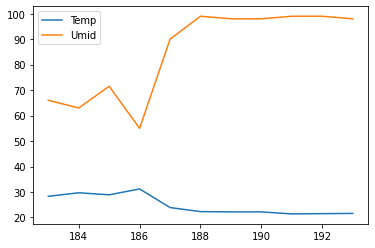

In [61]:
# b. captura a partir do padrão de T, P e U das 5 horas anteriores e posteriores de a 
df2.iloc[lista[0] - 5: lista[0] + 6][['Temp', 'Umid']].plot()
# c. plotar T, P, U e chuva como bolinha

<AxesSubplot:>

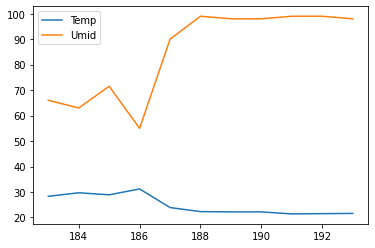

In [58]:
df2.iloc[lista[0] - 5: lista[0] + 6][['Temp', 'Umid']].plot()

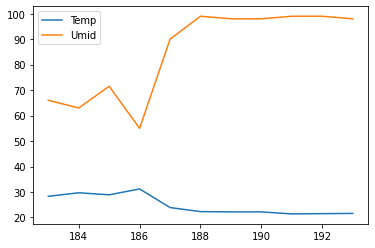

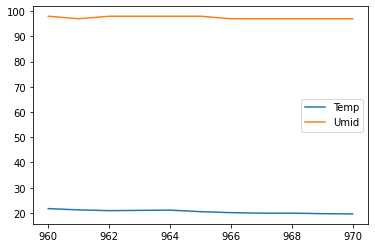

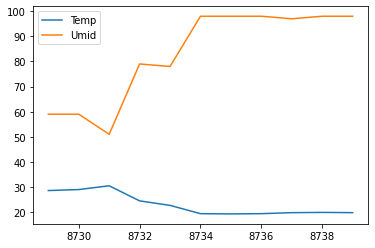

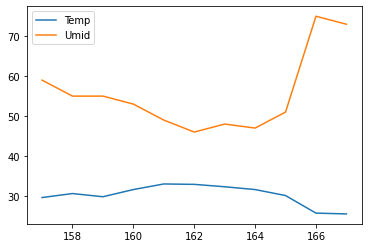

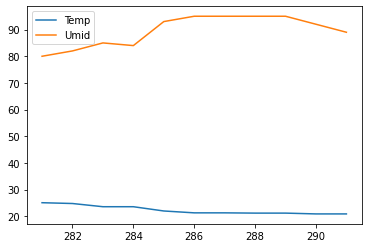

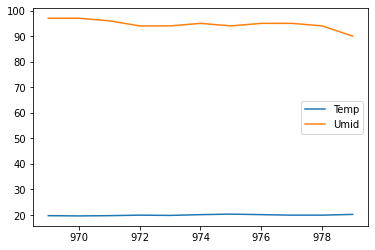

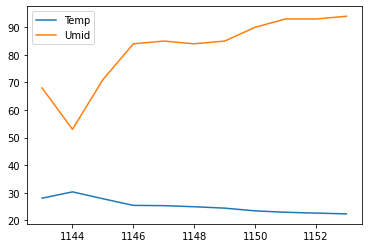

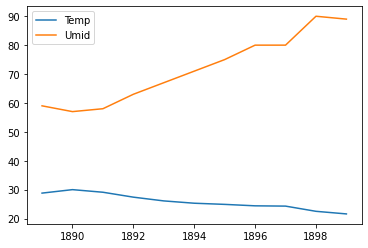

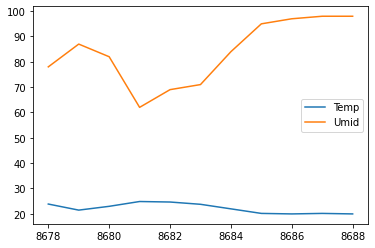

In [59]:
for i in lista:
    df2.iloc[i - 5: i + 6][['Temp', 'Umid']].plot()

In [34]:
df2['datahora'] == tempo_chv_muito_forte

ValueError: Can only compare identically-labeled Series objects

In [25]:
tempo_chv_muito_forte

NameError: name 'tempo_chv_muito_forte' is not defined

## Heatmap of the Pearson Correlation between the dataset columns.

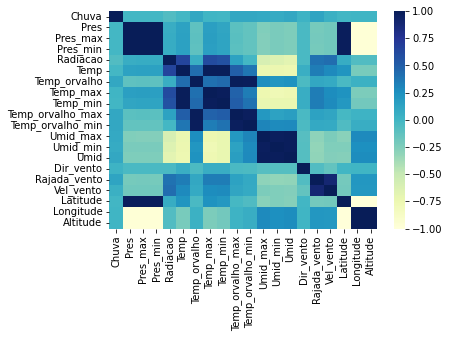

In [20]:
import seaborn as sns

# Heatmap
corr = df2.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu");

## Correlation between column pairs in a dataframe

,feature_1,feature_2,correlation
1,Chuva,Pres,-0.012333
2,Chuva,Pres_max,-0.011346
3,Chuva,Pres_min,-0.014560
4,Chuva,Radiacao,-0.062594
5,Chuva,Temp,-0.012448
